In [9]:
import numpy as np

def ricker( duration, dt, f ):
    freq = np.array( f )
    t = np.arange( -duration/2, duration/2 , dt)
    output = np.zeros( (t.size, freq.size ) )
    for i in range(freq.size):
        pi2 = (np.pi ** 2.0)
        if ( freq.size == 1 ):
            fsqr = freq ** 2.0
        else:
            fsqr = freq[i] ** 2.0
        tsqr = t ** 2.0
        pft = pi2 * fsqr * tsqr
        A = (1 - (2 * pft)) * np.exp(-pft)
        output[:,i] = A
    if freq.size == 1: output = output.flatten()
    return output

In [10]:
def convolve(w, file, slice_shape):
    print("processing", file)
    slice = np.load(file)
    data = np.transpose(slice.reshape(slice_shape))
    reflectivity = np.apply_along_axis(lambda x: np.convolve(x, [-0.5, 0.5], mode='same'), 0, data)
    seismic = np.apply_along_axis(lambda x: np.convolve(x, w, mode='same'), 0, reflectivity)
    return seismic

In [11]:
%matplotlib inline
import sys, os
import matplotlib.pyplot as plt
path_to_files = 'data_GBasin_simplified/'

In [12]:
w = ricker(0.25, 0.004, 10)

processing data_GBasin_simplified/out_0001_yz125.npy


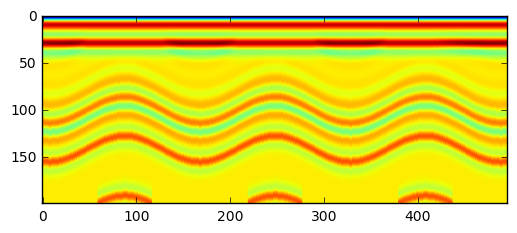

In [16]:
seismic = convolve(w,path_to_files+'out_0001_yz125.npy', (496, 200))
plt.imshow(seismic)

processing data_GBasin_simplified/out_0001_yz0.npy
processing data_GBasin_simplified/out_0001_yz100.npy
processing data_GBasin_simplified/out_0001_yz125.npy
processing data_GBasin_simplified/out_0001_yz150.npy
processing data_GBasin_simplified/out_0001_yz175.npy
processing data_GBasin_simplified/out_0001_yz200.npy
processing data_GBasin_simplified/out_0001_yz225.npy
processing data_GBasin_simplified/out_0001_yz25.npy
processing data_GBasin_simplified/out_0001_yz250.npy
processing data_GBasin_simplified/out_0001_yz275.npy
processing data_GBasin_simplified/out_0001_yz300.npy
processing data_GBasin_simplified/out_0001_yz325.npy
processing data_GBasin_simplified/out_0001_yz350.npy
processing data_GBasin_simplified/out_0001_yz375.npy
processing data_GBasin_simplified/out_0001_yz50.npy
processing data_GBasin_simplified/out_0001_yz75.npy
processing data_GBasin_simplified/out_0002_yz0.npy
processing data_GBasin_simplified/out_0002_yz100.npy
processing data_GBasin_simplified/out_0002_yz125.npy


NameError: name 'data' is not defined

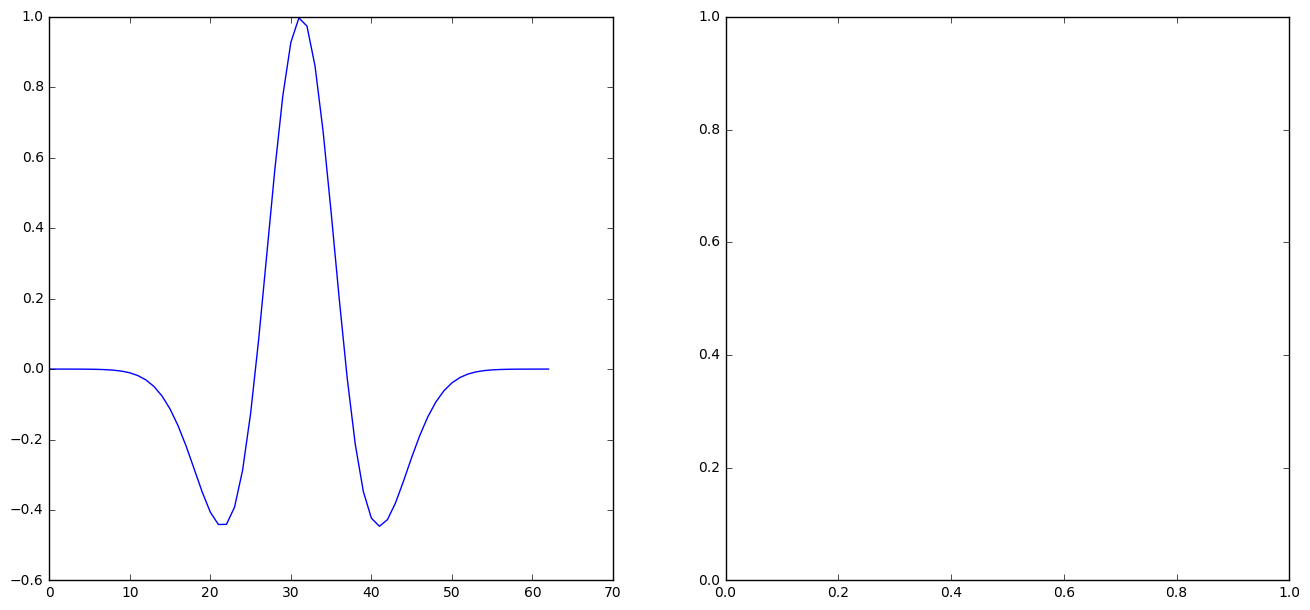

In [18]:
files = os.listdir(path_to_files)
su_files = [x for x in files if x.find("npy") != -1] 

yz_files = [x for x in su_files if x.find("yz") != -1]
yz_size = (496, 200)

xz_files = [x for x in su_files if x.find("xz") != -1]
xz_size = (376, 200)

seismic_path = path_to_files+'seismic/'

if not os.path.exists(seismic_path):
    os.makedirs(seismic_path)

for f in xz_files:
    seismic = convolve(w, path_to_files+f, xz_size)
    np.save(seismic_path+f, seismic)
    
for f in yz_files:
    seismic = convolve(w, path_to_files+f, yz_size)
    np.save(seismic_path+f, seismic)
    
plt.figure(figsize=(16,16))
plt.subplot(2,2,1)
plt.plot(w)
plt.subplot(2,2,2)
plt.imshow(data)
plt.subplot(2,2,4)
plt.imshow(seismic)